In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [33]:
df=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [34]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df.shape

(42000, 785)

In [36]:
import matplotlib.pyplot as plt

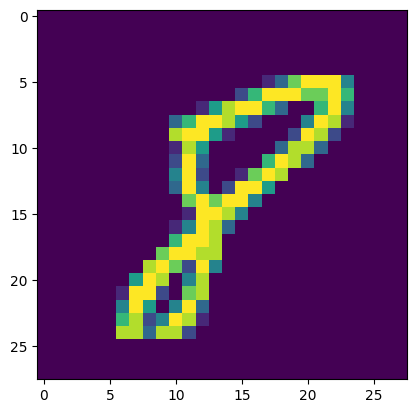

In [37]:
plt.imshow(df.iloc[18306,1:].values.reshape(28,28))

In [39]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
x_train.shape

(33600, 784)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn=KNeighborsClassifier()

In [16]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [18]:
import time
start=time.time()
y_pred=knn.predict(x_test)
print(time.time()-start)


12.359149932861328


In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [47]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [52]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [84]:
from sklearn.decomposition import PCA
pca=PCA(n_components=300)

In [85]:
x_train_trf=pca.fit_transform(x_train)
x_test_trf=pca.transform(x_test)

In [86]:
x_train.shape

(33600, 784)

In [87]:
x_train_trf.shape

(33600, 300)

In [88]:
knn=KNeighborsClassifier()

In [89]:
knn.fit(x_train_trf,y_train)

KNeighborsClassifier()

In [90]:
y_pred=knn.predict(x_test_trf)

In [91]:
accuracy_score(y_test,y_pred)

0.9465476190476191

In [100]:
#for i in range(1,785):
#pca=PCA(n_components=i)
 #x_train_trf=pca.fit_transform(x_train)
 #x_test_trf=pca.transform(x_test)
#knn=KNeighborsClassifier()
 #knn.fit(x_train_trf,y_train)
  #  y_pred=knn.predict(x_test_trf)
   # print(accuracy_score(y_test,y_pred))

In [102]:
 pca=PCA(n_components=2)
x_train_trf=pca.fit_transform(x_train)
x_test_trf=pca.transform(x_test)

In [104]:
import plotly.express as px
y_train_trf=y_train.astype(str)
fig=px.scatter(x=x_train_trf[:,0],
              y=x_train_trf[:,1],
              color=y_train_trf,
               color_discrete_sequence=px.colors.qualitative.G10
              )
fig.show()

In [105]:
pca.explained_variance_
# this shows eigon value of choosen two as we selected 2 component 

array([40.67111197, 29.17023362])

In [107]:
pca.components_.shape
#here it shows 2 eigon vectors working on 784 components

(2, 784)

In [109]:
#let us find optimum number of component require 
pca.explained_variance_ratio_#it shows that first two eigon vector contain 9% percentage of total variance 
#and we have to take number of eigon vector till 90% variance get

array([0.05785192, 0.0414927 ])

In [110]:
 pca=PCA(n_components=None)
x_train_trf=pca.fit_transform(x_train)
x_test_trf=pca.transform(x_test)

In [112]:
pca.explained_variance_ratio_
#here we can see that each vector percentage part of variance now we add vectors one by one till they reach 90%

array([5.78519225e-02, 4.14926968e-02, 3.80423901e-02, 2.96626277e-02,
       2.58156168e-02, 2.25498018e-02, 1.97306802e-02, 1.77527998e-02,
       1.56865066e-02, 1.43606328e-02, 1.37025484e-02, 1.22725500e-02,
       1.14691200e-02, 1.12302739e-02, 1.05852885e-02, 1.01993106e-02,
       9.57676152e-03, 9.42708817e-03, 9.12489429e-03, 8.90170190e-03,
       8.39940495e-03, 8.20063196e-03, 7.85303229e-03, 7.56739707e-03,
       7.37261022e-03, 7.01884653e-03, 6.97919728e-03, 6.71104483e-03,
       6.39845030e-03, 6.30337291e-03, 6.15350848e-03, 6.02388659e-03,
       5.83673972e-03, 5.78547759e-03, 5.72333148e-03, 5.46399774e-03,
       5.43207369e-03, 5.28172755e-03, 5.13381744e-03, 4.94015474e-03,
       4.87671103e-03, 4.81978768e-03, 4.68204430e-03, 4.59342487e-03,
       4.57660834e-03, 4.49219022e-03, 4.44682221e-03, 4.41540749e-03,
       4.35111936e-03, 4.32032928e-03, 4.21808870e-03, 4.18243127e-03,
       4.07994349e-03, 4.02004913e-03, 3.98335855e-03, 3.94598812e-03,
      

In [113]:
#thats why we are doing cum_sum of all vectors
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

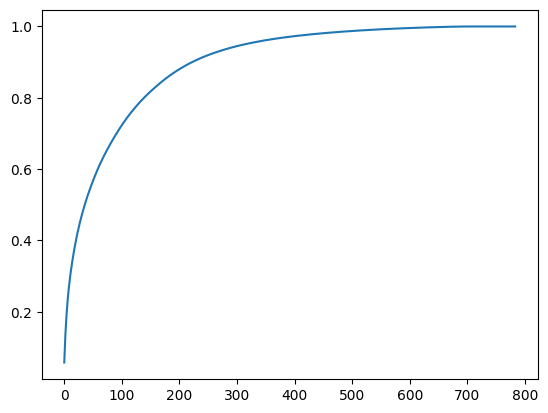

In [114]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
#by this graph we can see that where the exact 90% reach
#y shows the perecentage and x shows the number og components